# Лабораторная работа 4. Кластеризация
## 1. Введение
**Цель работы:** изучение алгоритмов кластеризации, приобретение навыков оценки качества разбиения данных на кластеры и интерпретации результатов.

**Постановка задачи:**
1. Загрузить датасет для задачи кластеризации / классификации (например, с платформы Kaggle). Провести дескриптивный анализ данных: определить размерность, типы признаков, наличие пропусков. Оценить распределение переменных (близость к нормальному) с использованием визуализации (гистограммы). Проверить условие применения кластеризации: отсутствие классов, осмысленность кластеризации, отсутствие выбросов.

2. Выполнить стандартизацию / нормализацию числовых признаков. Обосновать выбор метода масштабирования. Построить матрицу диаграмм рассеивания для визуальной оценки структуры данных, предположительного количества кластеров и типа кластерной структуры. Аргументировать выбор методов кластеризации на основе формы, размера и плотности кластеров.

3. Реализовать кластеризацию двумя различными методами на выбор: K-means (K-средних); иерархическая кластеризация; DBSCAN; EM-алгоритм (Gaussian Mixture). Для методов, требующих задания числа кластеров (K-means, иерархическая), подобрать оптимальное значение k с использованием: метода локтя и / или анализа силуэта.

4. Рассчитать метрики качества для обоих методов: внутренние и внешние. Оценить расстояние между кластерами, внутрикластерные расстояния, компактность кластеров, центры кластеров. Опционально, если известно разделение на классы, посчитать: индекс Rand, индекс Жаккара и др. внешние метрики. Привести содержательную интерпретацию полученных значений.

5. Исследовать влияние параметров одного из методов (например, ε и min_samples для DBSCAN или количества кластеров k для K-means) на качество кластеризации.

6. Визуализировать полученные кластеры в пространстве признаков (использовать PCA для снижения размерности при необходимости). Проанализировать центры кластеров (для K-means) и дать содержательную интерпретацию выделенных групп. Сравнить результаты, полученные двумя разными методами.
## 2. Описание датасета
Датасет **Wine Dataset for Clustering** представляет собой классический набор данных, изначально полученный из задачи классификации, но часто используемый и для задач кластеризации. Он содержит результаты химического анализа вин, произведенных в конкретном регионе Италии. Каждое вино характеризуется 13 различными химическими признаками. В оригинальной задаче классификации вина принадлежат к одному из 3 сортов.

**Структура датасета:**

- Количество наблюдений: 178
- Количество признаков: 13

**Описание признаков:**

- Alcohol - процент содержания алкоголя.
- Malic_acid - содержание яблочной кислоты.
- Ash - содержание золы.
- Ash_Alcanity - щелочность золы.
- Magnesium - содержание магния.
- Total_Phenols - общее содержание фенолов.
- Flavanoids - содержание флавоноидов.
- Nonflavanoid_Phenols - содержание нефлавоноидных фенолов.
- Proanthocyanins - содержание проантоцианидинов.
- Color_intensity - интенсивность цвета.
- Hue - цветовой оттенок.
- OD280 - результаты спектроскопии (отношение оптической плотности при 280 и 315 нм).
- Proline - содержание аминокислоты пролин.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA

In [14]:
df = pd.read_csv('wine-clustering.csv')

print("Размерность датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum().sum())
print("\nПервые строки датасета:")
df.head()

Размерность датасета: (178, 13)

Типы данных:
Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

Пропущенные значения:
0

Первые строки датасета:


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


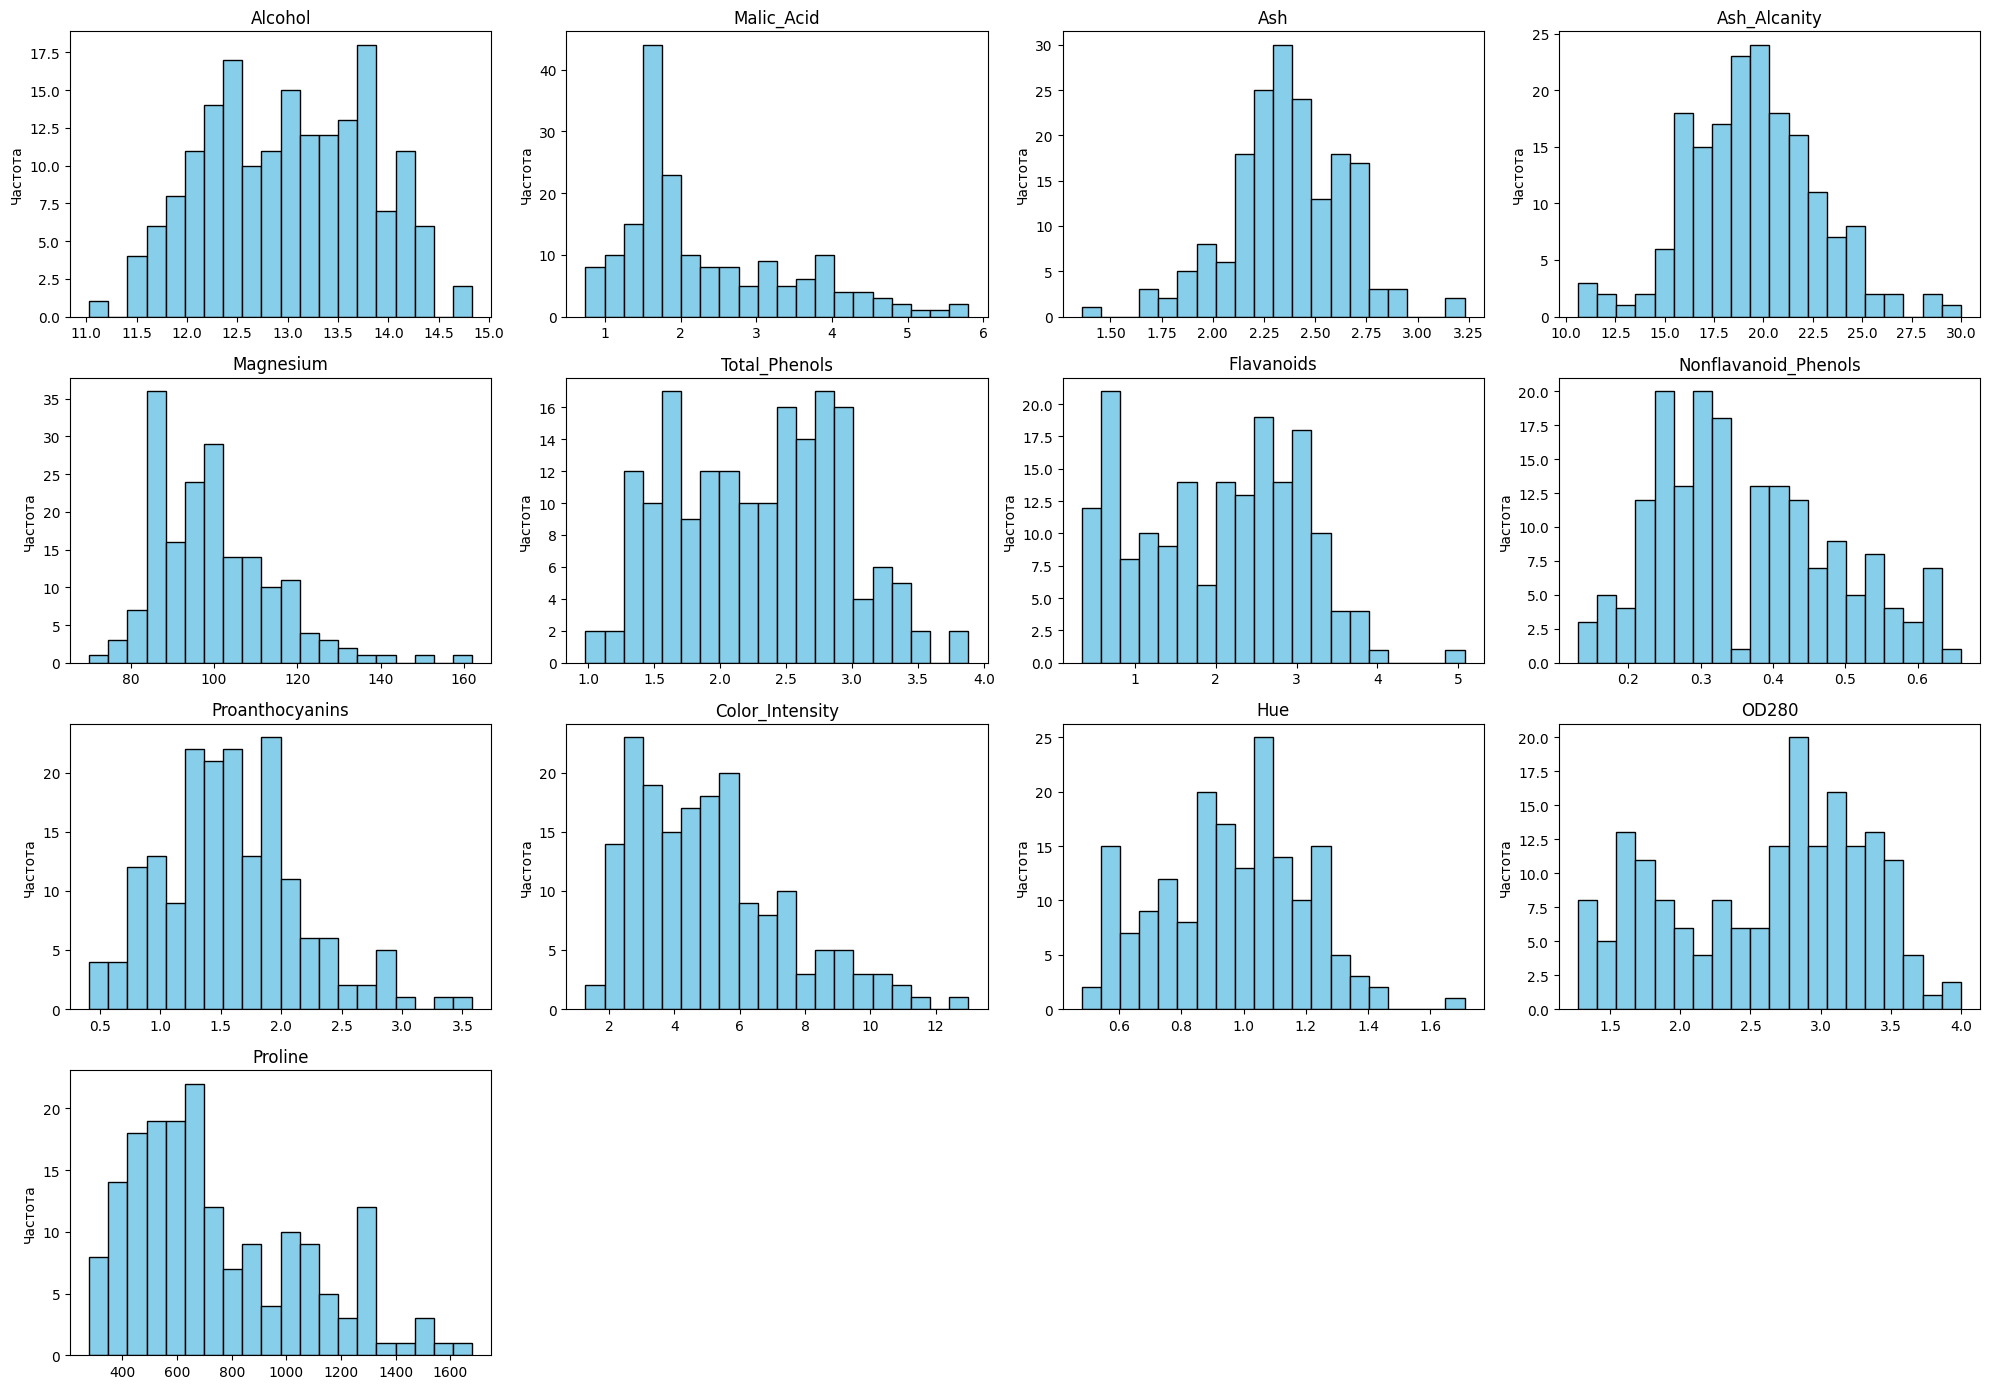

In [15]:
fig, axes = plt.subplots(4, 4, figsize=(20, 14))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_ylabel('Частота')

for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [16]:
stats = pd.DataFrame({
    'Среднее': df.mean(),
    'Медиана': df.median(),
    'Мода': df.mode().iloc[0] if not df.mode().empty else np.nan,
    'Минимум': df.min(),
    'Максимум': df.max(),
    'Асимметрия': df.skew(),
    'Эксцесс': df.kurtosis()
})

stats = stats.round(4)
stats

,Среднее,Медиана,Мода,Минимум,Максимум,Асимметрия,Эксцесс
Alcohol,13.0006,13.050,12.37,11.03,14.83,-0.0515,-0.8525
Malic_Acid,2.3363,1.865,1.73,0.74,5.80,1.0397,0.2992
Ash,2.3665,2.360,2.28,1.36,3.23,-0.1767,1.1440
Ash_Alcanity,19.4949,19.500,20.00,10.60,30.00,0.2130,0.4879
Magnesium,99.7416,98.000,88.00,70.00,162.00,1.0982,2.1050
Total_Phenols,2.2951,2.355,2.20,0.98,3.88,0.0866,-0.8356
Flavanoids,2.0293,2.135,2.65,0.34,5.08,0.0253,-0.8804
Nonflavanoid_Phenols,0.3619,0.340,0.26,0.13,0.66,0.4502,-0.6372
Proanthocyanins,1.5909,1.555,1.35,0.41,3.58,0.5171,0.5546
Color_Intensity,5.0581,4.690,2.60,1.28,13.00,0.8686,0.3815


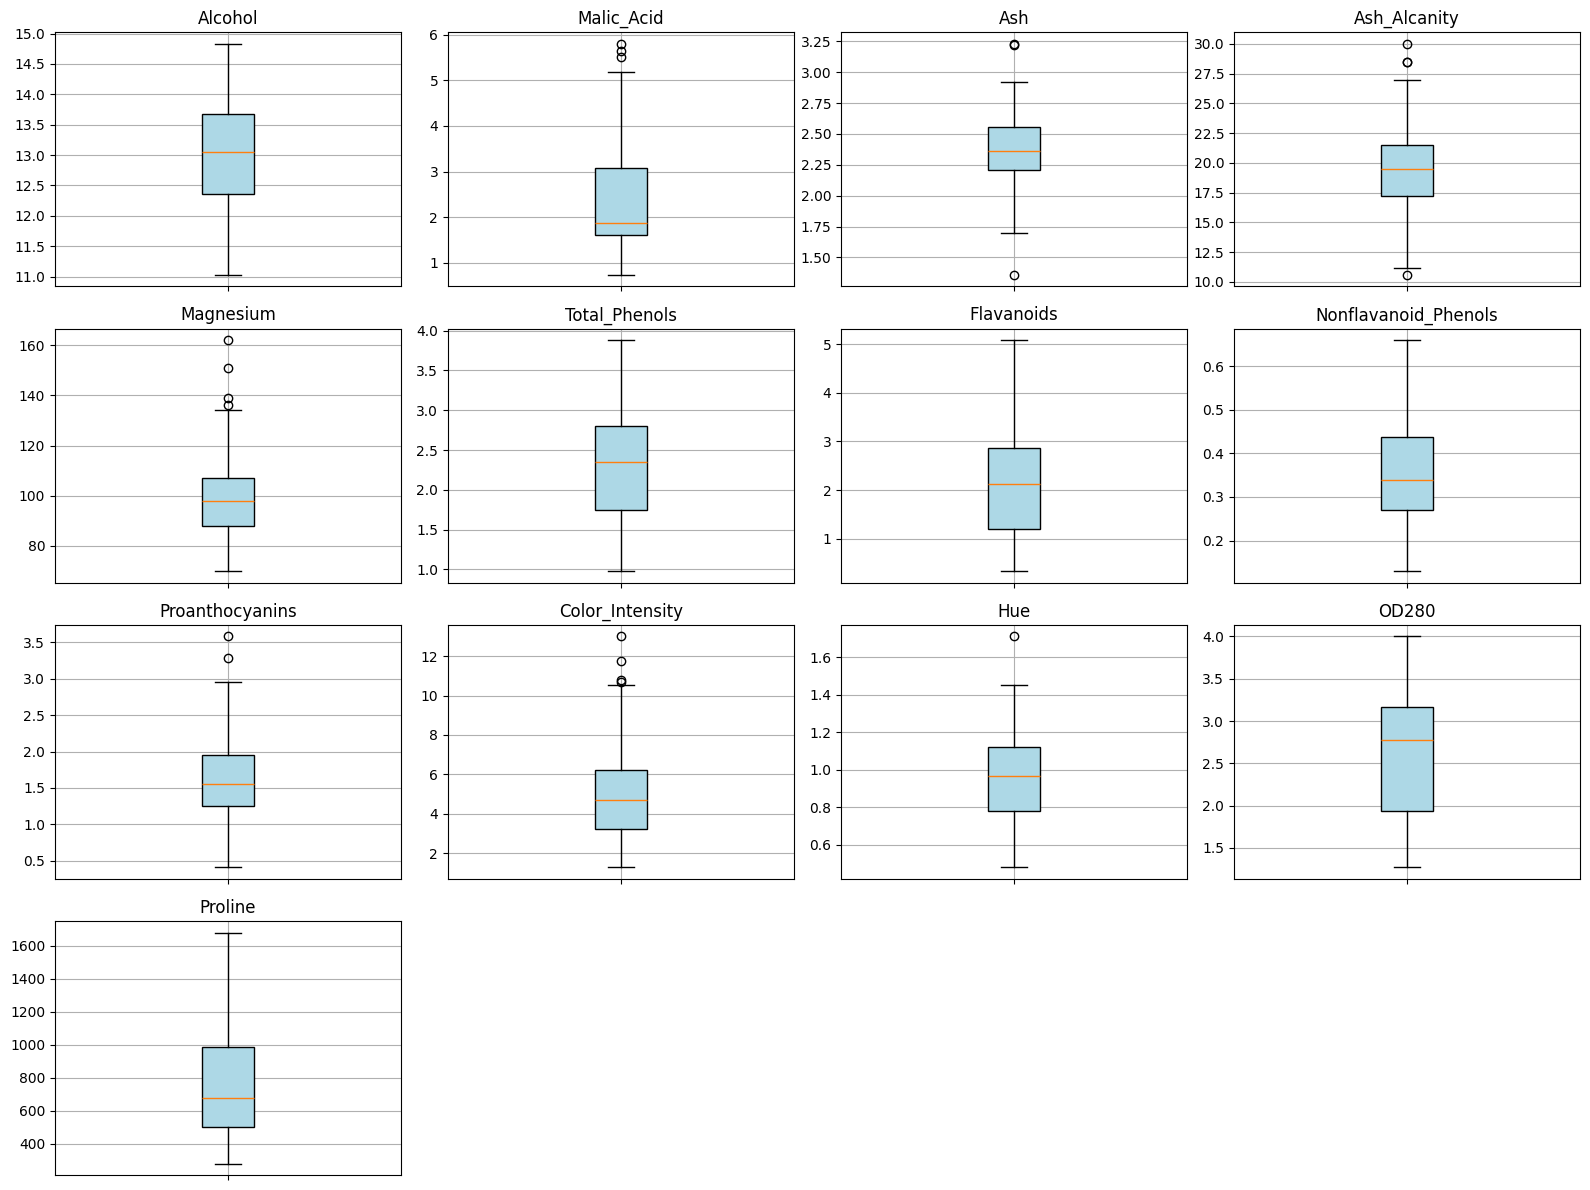

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col], patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    axes[i].grid(True)
    axes[i].set_xticklabels([])

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Alcohol - содержание алкоголя в винах распределено почти симметрично вокруг среднего значения 13.00, медиана (13.05) близка к среднему, асимметрия незначительна, что указывает на нормальность распределения; минимальное значение 11.03, максимальное — 14.83, выбросы отсутствуют.

2. Malic_Acid - уровень яблочной кислоты имеет выраженную правостороннюю асимметрию (1.04), что означает наличие редких образцов с высоким содержанием кислоты, медиана (1.87) значительно ниже среднего (2.34), подтверждая скос, максимальное значение 5.80 является потенциальным выбросом.

3. Ash - содержание золы распределено практически симметрично (асимметрия -0.18), медиана и среднее почти совпадают, эксцесс 1.14 указывает на более острую вершину, чем у нормального распределения, диапазон значений узкий — от 1.36 до 3.23.

4. Ash_Alcanity - щелочность золы имеет слабую правостороннюю асимметрию (0.21) и умеренный эксцесс (0.49), распределение близко к нормальному, медиана и среднее совпадают, выбросы присутствуют, но не критичны для анализа.

5. Magnesium - содержание магния сильно скошено вправо (асимметрия 1.10), медиана (98.0) почти совпадает со среднеим (99.74), что говорит о наличии образцов с очень высоким содержанием, эксцесс 2.11 указывает на тяжелые хвосты и острую вершину, есть выбросы.

6. Total_Phenols - общее содержание фенолов почти симметрично распределено (асимметрия 0.09), эксцесс отрицательный (-0.84), что свидетельствует о плоской вершине, медиана (2.36) близка к среднему, выбросы минимальны.

7. Flavanoids - флаваноиды имеют почти симметричное распределение (асимметрия 0.03), с заметно отрицательным эксцессом (-0.88), что указывает на «плоское» распределение, медиана и среднее практически равны, выбросов нет.

8. Nonflavanoid_Phenols - нефлаваноидные фенолы имеют умеренную правостороннюю асимметрию (0.45), медиана (0.34) ниже среднего (0.36), распределение слегка скошено, но без резких выбросов, эксцесс отрицательный (-0.64), что указывает на плоскую вершину.

9. Proanthocyanins - содержание проантоцианидинов имеет умеренную правостороннюю асимметрию (0.52) и положительный эксцесс (0.55), что говорит о наличии пиков и длинных хвостов, медиана (1.56) почти совпадает со средним (1.59), выбросы есть.

10. Color_Intensity - интенсивность цвета сильно скошена вправо (асимметрия 0.87), медиана (4.69) ниже среднего (5.06), что указывает на наличие образцов с очень насыщенным цветом, эксцесс 0.38 указывает на острую вершину, выбросы присутствуют.

11. Hue - оттенок имеет почти симметричное распределение (асимметрия 0.02), эксцесс отрицательный (-0.34), что говорит о «плоском» распределении, медиана и среднее совпадают, выбросы присутствуют.

12. OD280 - оптическая плотность при 280 нм имеет левостороннюю асимметрию (-0.31) и отрицательный эксцесс (-1.09), что указывает на плоское распределение с легким смещением влево; медиана (2.78) выше среднего (2.61), выбросов нет.

13. Proline - содержание пролина сильно скошено вправо (асимметрия 0.77), медиана (673.5) значительно ниже среднего (746.9), что указывает на наличие редких образцов с очень высоким содержанием; эксцесс отрицательный (-0.25), что говорит о «плоской» вершине; выбросы нет.

## 3. Предобработка данных
Для предобработки данных был выбран **метод стандартизации** с использованием StandardScaler из библиотеки scikit-learn. Признаки в датасете имеют существенно разный масштаб - например, значения Proline измеряются в сотнях, в то время как Nonflavanoid_Phenols лежит в диапазоне единиц. Без масштабирования признаки с большими значениями будут неоправданно доминировать при вычислении расстояний, что исказит результаты кластеризации. Также в данных присутствуют выбросы, особенно в таких признаках, как Proanthocyanins, Magnesium и Color_Intensity. Стандартизация более устойчива к выбросам по сравнению с нормализацией, так как основана на среднем и стандартном отклонении, а не на крайних значениях.

<Figure size 1400x1200 with 0 Axes>

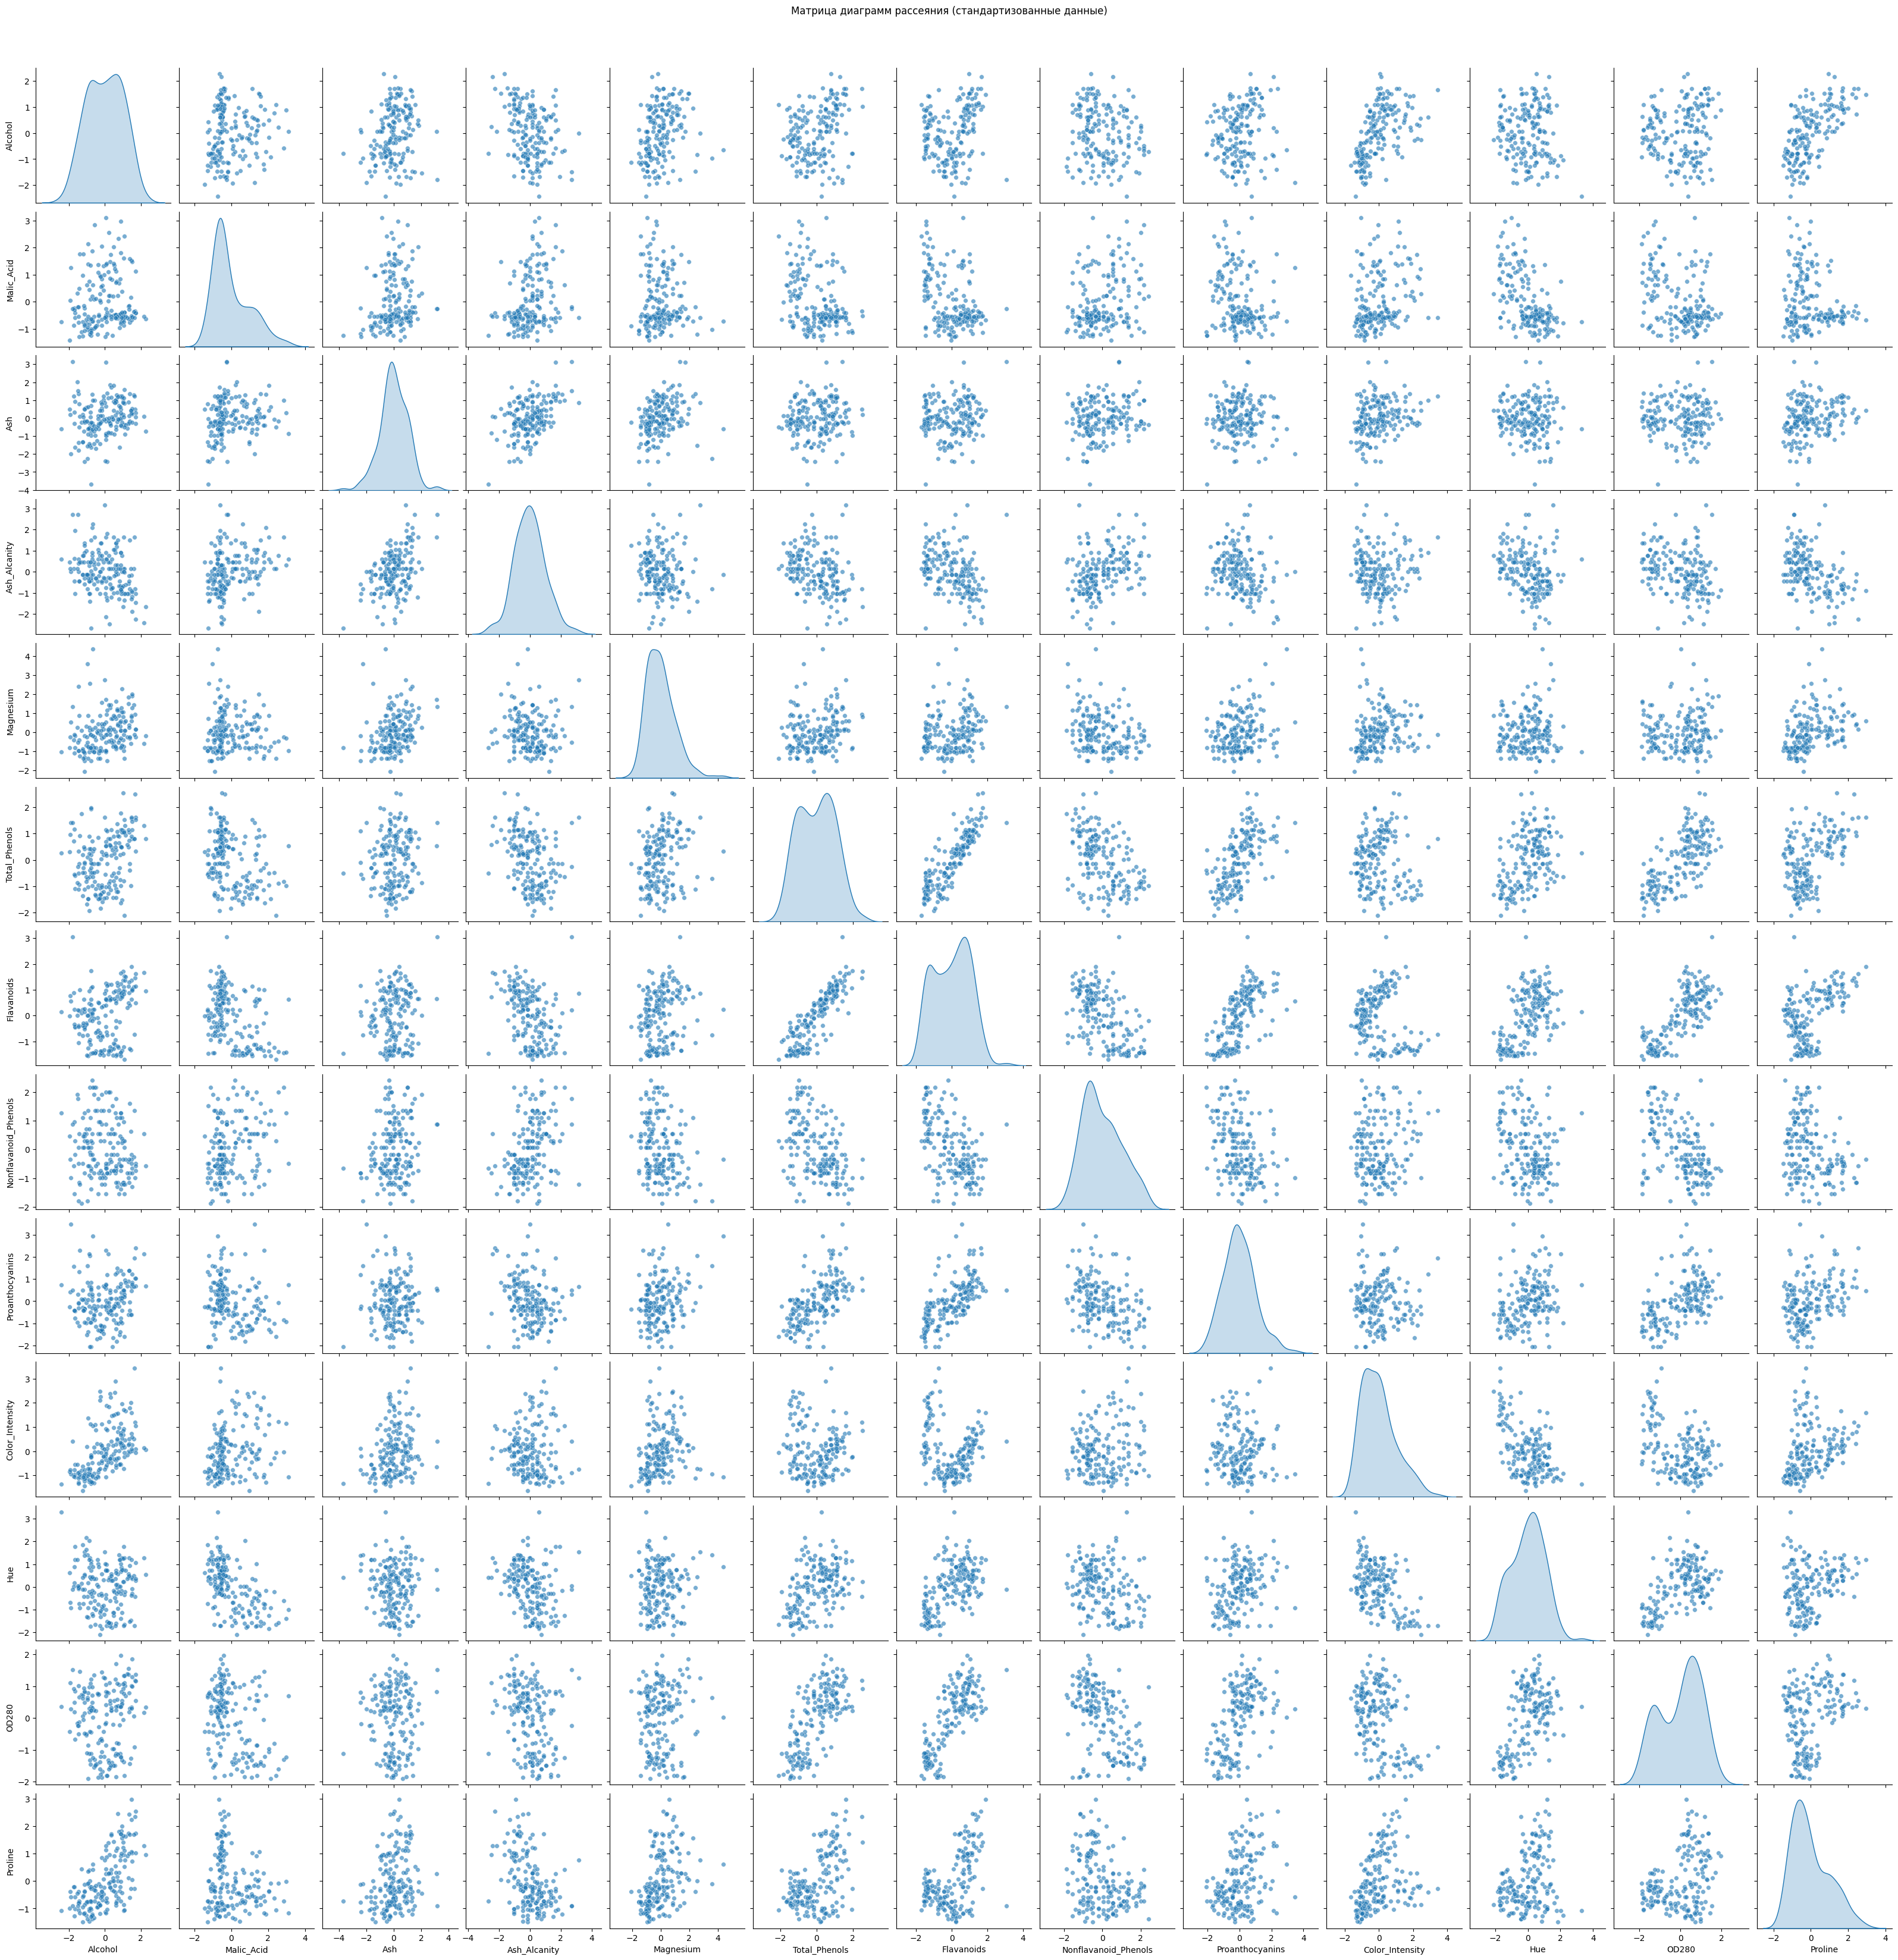

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

plt.figure(figsize=(14, 12))
sns.pairplot(df_scaled, diag_kind='kde', plot_kws={'s': 30, 'alpha': 0.6})
plt.suptitle('Матрица диаграмм рассеяния (стандартизованные данные)', y=1.02)
plt.show()

Почти все пары признаков дают однородные облака, без чётких разрывов или групп. Некоторые пары признаков дают вытянутые облака (линейная корреляция), что соответствует гауссовым/эллиптическим кластерам, но границ не видно. Тип кластерной структуры - выпуклый (компактный, сферический). Использовать будем Gaussian Mixture Models (GMM), так как он умеет находить пересекающиеся и эллиптические кластеры, работает с слабо разделёнными структурами, и K-Means. Предполагается 2-3 кластера.

## 4. Ход работы
### a. K-mean

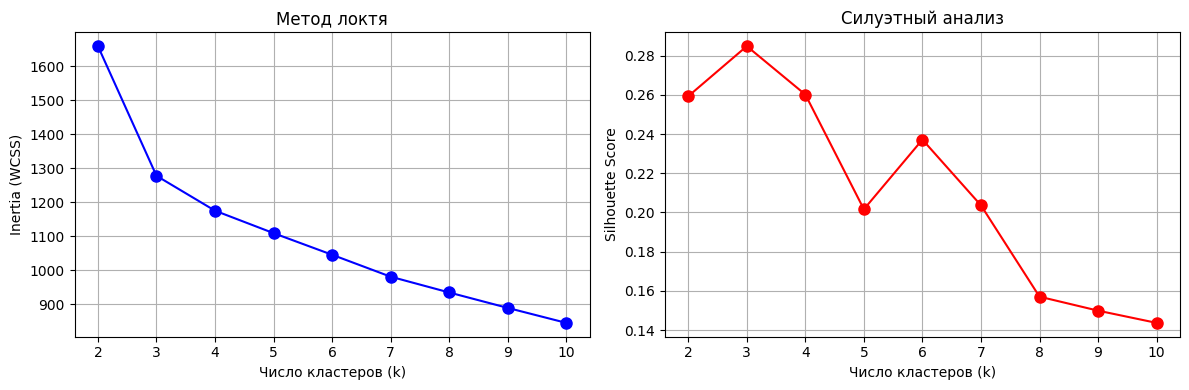

In [19]:
k_range = range(2, 11)
inertias = []
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(df_scaled, labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bo-', markersize=8)
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Метод локтя')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-', markersize=8)
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Силуэтный анализ')
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
metrics_df = pd.DataFrame({
    'k': k_range,
    'Inertia': inertias,
    'Silhouette': silhouette_scores,
    'Calinski-Harabasz': calinski_harabasz_scores,
})
metrics_df.round(3)

,k,Inertia,Silhouette,Calinski-Harabasz
0,2,1658.759,0.259,69.523
1,3,1277.928,0.285,70.940
2,4,1175.428,0.260,56.181
3,5,1109.513,0.202,46.952
4,6,1046.002,0.237,41.701
5,7,981.595,0.204,38.686
6,8,935.201,0.157,35.805
7,9,889.893,0.150,33.807
8,10,845.895,0.144,32.397


Излом на графике метода локтя наблюдается при k=3: дальнейшее увеличение числа кластеров приводит к лишь незначительному снижению внутрикластерной суммы квадратов (inertia). При k=3 достигается баланс между компактностью кластеров и общей интерпретируемостью разбиения. Максимальное значение силуэтного коэффициента также достигается при k=3, что указывает на оптимальную степень разделённости кластеров. Таким образом, **оптимальное число кластеров: k=3.**

Полученные метрики при лучшем количестве кластеров (k=3) указывают на умеренное качество кластеризации: значение силуэтного коэффициента 0.285 говорит о том, что кластеры слабо выражены - объекты внутри кластеров сгруппированы недостаточно плотно по сравнению с расстоянием до соседних кластеров, что может свидетельствовать о частичном перекрытии групп или неоптимальной структуре разбиения, при этом инерция 1277.93 отражает общий разброс точек от центров, но сама по себе не позволяет судить о качестве без сравнения с другими значениями k, индекс Калинского–Харабаша 70.94 хоть и положителен, но относительно невысок для датасета, таким образом, несмотря на согласованность с известной структурой данных (3 класса), текущая модель K-means, вероятно, страдает от влияния выбросов, недостаточной разделимости в некоторых признаках или последствий стандартизации.

Влияние параметра k на качество:

При малых значениях, например k=2 , структура данных оказывается упрощённой - естественные подгруппы сливаются, что приводит к высокой внутрикластерной дисперсии и снижению силуэтного коэффициента. При k=3 достигается оптимальный баланс - кластеры становятся компактными, хорошо разделёнными, а силуэтный коэффициент достигают максимума. Дальнейшее увеличение k до 4 и более приводит к фрагментации исходных групп, снижению среднего силуэтного значения, росту числа мелких и неинтерпретируемых кластеров, при этом уменьшение инерции становится незначительным, что указывает на переобучение. Таким образом, именно k=3 обеспечивает наилучшее сочетание компактности, разделимости и содержательной интерпретируемости выделенных групп.

In [21]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(df_scaled)

centers_scaled = kmeans_final.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
print("Центры кластеров (в исходных единицах измерения):")
centers_df = pd.DataFrame(centers_original, columns=df.columns)
centers_df.index.name = 'Кластер'
centers_df.round(2)

Центры кластеров (в исходных единицах измерения):


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Кластер,,,,,,,,,,,,,
0,12.25,1.90,2.23,20.06,92.74,2.25,2.05,0.36,1.62,2.97,1.06,2.80,510.17
1,13.13,3.31,2.42,21.24,98.67,1.68,0.82,0.45,1.15,7.23,0.69,1.70,619.06
2,13.68,2.00,2.47,17.46,107.97,2.85,3.00,0.29,1.92,5.45,1.07,3.16,1100.23


In [22]:
distances_to_own_center = np.linalg.norm(
    df_scaled.values - centers_scaled[labels_kmeans], axis=1
)

intra_distances = {}
for i in range(3):
    mask = (labels_kmeans == i)
    intra_distances[i] = distances_to_own_center[mask]

print("\nВнутрикластерные расстояния:")
for i in range(3):
    d = intra_distances[i]
    print(f"Кластер {i}:")
    print(f"Среднее расстояние до центра: {d.mean():.3f}")
    print(f"Сумма квадратов расстояний (WCSS): {np.sum(d**2):.1f}")
    print(f"Максимальное расстояние (радиус): {d.max():.3f}")


Внутрикластерные расстояния:
Кластер 0:
Среднее расстояние до центра: 2.789
Сумма квадратов расстояний (WCSS): 561.9
Максимальное расстояние (радиус): 5.396
Кластер 1:
Среднее расстояние до центра: 2.445
Сумма квадратов расстояний (WCSS): 328.2
Максимальное расстояние (радиус): 4.960
Кластер 2:
Среднее расстояние до центра: 2.337
Сумма квадратов расстояний (WCSS): 387.9
Максимальное расстояние (радиус): 6.162


In [23]:
inter_center_distances = pdist(centers_scaled, metric='euclidean')
inter_center_matrix = squareform(inter_center_distances)

print("\nМатрица расстояний между центрами кластеров (евклидово):")
inter_center_df = pd.DataFrame(inter_center_matrix, 
                               index=[f'Кластер {i}' for i in range(3)],
                               columns=[f'Кластер {i}' for i in range(3)])
display(inter_center_df.round(3))


Матрица расстояний между центрами кластеров (евклидово):


,Кластер 0,Кластер 1,Кластер 2
Кластер 0,0.000,3.973,3.596
Кластер 1,3.973,0.000,5.029
Кластер 2,3.596,5.029,0.000


In [24]:
avg_intra_distance = distances_to_own_center.mean()
total_wcss = np.sum(distances_to_own_center**2)

print(f"\nОбщая компактность:")
print(f"Среднее внутрикластерное расстояние: {avg_intra_distance:.3f}")
print(f"Общая сумма внутрикластерных квадратов (WCSS): {total_wcss:.1f}")

avg_inter_center_distance = inter_center_distances.mean()
print(f"Среднее расстояние между центрами кластеров: {avg_inter_center_distance:.3f}")

separation_ratio = avg_inter_center_distance / avg_intra_distance
print(f"Отношение межкластерного / внутрикластерного расстояния: {separation_ratio:.2f}")


Общая компактность:
Среднее внутрикластерное расстояние: 2.533
Общая сумма внутрикластерных квадратов (WCSS): 1277.9
Среднее расстояние между центрами кластеров: 4.199
Отношение межкластерного / внутрикластерного расстояния: 1.66


Центр кластера 0 характеризуется умеренным содержанием алкоголя (12.25%), относительно низкой интенсивностью цвета (2.97) и самым низким уровнем пролина (510 мг/л), что типично для лёгких, менее насыщенных вин. Кластер 1 выделяется самым высоким содержанием яблочной кислоты (3.31 г/л), низкими флаваноидами (0.82) и очень низким оттенком (Hue = 0.69), а также высокой цветовой интенсивностью (7.23) - такая комбинация может соответствовать более кислым и тёмным винам с меньшей выдержанностью. Кластер 2, напротив, демонстрирует высокие значения алкоголя (13.68%), флаваноидов (3.00), OD280 (3.16) и особенно пролина (1100 мг/л), что характерно для богатых, насыщенных и, вероятно, высококачественных красных вин, произведённых в тёплом климате.

С точки зрения качества разбиения, кластеры обладают умеренной компактностью: среднее внутрикластерное расстояние равно 2.53, при этом кластер 2 имеет наибольший радиус (6.16), что говорит о большей неоднородности его состава. Расстояния между центрами кластеров (от 3.60 до 5.03) превышают внутрикластерные, но отношение межкластерного и внутрикластерного расстояний составляет всего 1.66, что подтверждает умеренную разделимость групп. Это согласуется с низким значением силуэтного коэффициента (0.285) и указывает на частичное перекрытие кластеров в признаковом пространстве - особенно между кластерами 0 и 2, чьи центры ближе друг к другу (3.60), чем к кластеру 1. Таким образом, хотя химический состав выделенных групп позволяет дать осмысленную интерпретацию (лёгкие, кислые и насыщенные вина), их границы не являются чёткими, что объясняет посредственные метрики качества.

### b. Gaussian Mixture Model (GMM / EM-алгоритм)

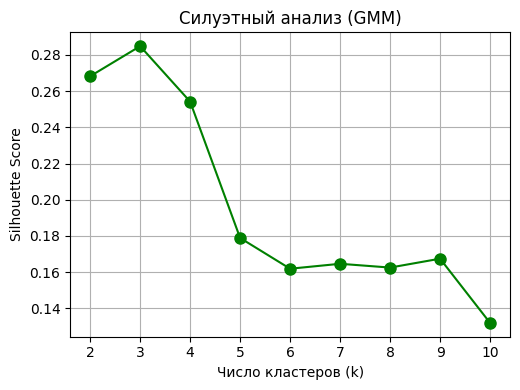

,k,Silhouette,Calinski-Harabasz
0,2,0.268,64.683
1,3,0.285,70.940
2,4,0.254,52.759
3,5,0.179,45.346
4,6,0.162,38.693
5,7,0.165,35.990
6,8,0.163,32.903
7,9,0.167,31.299
8,10,0.132,30.070


In [25]:
k_range = range(2, 11)
silhouette_scores_gmm = []
calinski_harabasz_scores_gmm = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42, covariance_type='full')
    labels = gmm.fit_predict(df_scaled)

    silhouette_scores_gmm.append(silhouette_score(df_scaled, labels))
    calinski_harabasz_scores_gmm.append(calinski_harabasz_score(df_scaled, labels))

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores_gmm, 'go-', markersize=8)
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Силуэтный анализ (GMM)')
plt.grid(True)

plt.tight_layout()
plt.show()

metrics_gmm_df = pd.DataFrame({
    'k': k_range,
    'Silhouette': silhouette_scores_gmm,
    'Calinski-Harabasz': calinski_harabasz_scores_gmm,
})
metrics_gmm_df.round(3)

Анализ метрик показывает, что оптимальное число кластеров также равно k = 3: именно при этом значении достигаются максимальные значения как силуэтного коэффициента (0.285), так и индекса Калинского–Харабаша (70.940), что указывает на наилучшую разделимость и компактность кластеров среди всех рассмотренных вариантов. При увеличении числа компонентов (k > 3) обе метрики устойчиво снижаются, что свидетельствует о переобучении модели и разбиении естественных групп на искусственные подкластеры без улучшения структуры.

Тем не менее, абсолютные значения метрик остаются умеренными: силуэтный коэффициент 0.285 говорит о слабой выраженности границ между кластерами - объекты не всегда чётко принадлежат своей группе и могут быть ближе к соседним кластерам, а индекс Калинского–Харабаша, хотя и достигает максимума при k=3, остаётся относительно низким. Это позволяет сделать вывод, что и GMM, несмотря на большую гибкость по сравнению с K-means (возможность моделировать эллиптические кластеры разной ориентации и формы), не смог полностью раскрыть естественную структуру данных, вероятно, из-за влияния выбросов, сильной асимметрии некоторых признаков. Таким образом, хотя GMM теоретически лучше подходит для данного типа данных, на практике его результаты аналогичны по качеству K-means.

In [26]:
gmm_final = GaussianMixture(n_components=3, random_state=42, covariance_type='full')
labels_gmm = gmm_final.fit_predict(df_scaled)

centers_gmm_scaled = gmm_final.means_
centers_gmm_original = scaler.inverse_transform(centers_gmm_scaled)

print("Центры кластеров GMM (в исходных единицах измерения):")
centers_gmm_df = pd.DataFrame(centers_gmm_original, columns=df.columns)
centers_gmm_df.index.name = 'Кластер'
display(centers_gmm_df.round(2))

Центры кластеров GMM (в исходных единицах измерения):


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Кластер,,,,,,,,,,,,,
0,12.25,1.90,2.23,20.06,92.82,2.25,2.05,0.36,1.62,2.97,1.06,2.80,509.52
1,13.13,3.31,2.42,21.25,98.69,1.68,0.82,0.45,1.15,7.24,0.69,1.70,619.41
2,13.67,2.00,2.47,17.47,107.82,2.84,3.00,0.29,1.92,5.45,1.07,3.16,1098.62


In [27]:
distances_gmm = np.linalg.norm(
    df_scaled.values - centers_gmm_scaled[labels_gmm], axis=1
)

intra_gmm = {}
for i in range(3):
    mask = (labels_gmm == i)
    intra_gmm[i] = distances_gmm[mask]

print("\nВнутрикластерные расстояния (GMM):")
for i in range(3):
    d = intra_gmm[i]
    print(f"Кластер {i}:")
    print(f"  Среднее расстояние до центра: {d.mean():.3f}")
    print(f"  Сумма квадратов расстояний: {np.sum(d**2):.1f}")
    print(f"  Максимальное расстояние (радиус): {d.max():.3f}")


Внутрикластерные расстояния (GMM):
Кластер 0:
  Среднее расстояние до центра: 2.789
  Сумма квадратов расстояний: 561.9
  Максимальное расстояние (радиус): 5.395
Кластер 1:
  Среднее расстояние до центра: 2.445
  Сумма квадратов расстояний: 328.2
  Максимальное расстояние (радиус): 4.958
Кластер 2:
  Среднее расстояние до центра: 2.336
  Сумма квадратов расстояний: 387.9
  Максимальное расстояние (радиус): 6.162


In [28]:
inter_center_gmm = pdist(centers_gmm_scaled, metric='euclidean')
inter_center_matrix_gmm = squareform(inter_center_gmm)

print("\nМатрица расстояний между центрами (GMM):")
inter_gmm_df = pd.DataFrame(inter_center_matrix_gmm,
                           index=[f'Кластер {i}' for i in range(3)],
                           columns=[f'Кластер {i}' for i in range(3)])
display(inter_gmm_df.round(3))


Матрица расстояний между центрами (GMM):


,Кластер 0,Кластер 1,Кластер 2
Кластер 0,0.000,3.971,3.587
Кластер 1,3.971,0.000,5.024
Кластер 2,3.587,5.024,0.000


In [29]:
avg_intra_gmm = distances_gmm.mean()
total_wcss_gmm = np.sum(distances_gmm**2)
avg_inter_gmm = inter_center_gmm.mean()
separation_ratio_gmm = avg_inter_gmm / avg_intra_gmm

print(f"\nОбщая компактность (GMM):")
print(f"Среднее внутрикластерное расстояние: {avg_intra_gmm:.3f}")
print(f"Общая WCSS: {total_wcss_gmm:.1f}")
print(f"Среднее расстояние между центрами: {avg_inter_gmm:.3f}")
print(f"Отношение меж-/внутрикластерного расстояния: {separation_ratio_gmm:.2f}")


Общая компактность (GMM):
Среднее внутрикластерное расстояние: 2.533
Общая WCSS: 1277.9
Среднее расстояние между центрами: 4.194
Отношение меж-/внутрикластерного расстояния: 1.66


Результаты кластеризации с использованием Gaussian Mixture Model (GMM) демонстрируют практически идентичную содержательную интерпретацию выделенных групп по сравнению с K-means. Кластер 0 описывает лёгкие вина с умеренным содержанием алкоголя (12.25%), низкой цветовой интенсивностью (2.97) и минимальным уровнем пролина (509.5 мг/л). Кластер 1 соответствует более кислым и тёмным винам, характеризующимся высоким содержанием яблочной кислоты (3.31 г/л), низкими флаваноидами (0.82) и оттенком Hue = 0.69 при высокой интенсивности цвета (7.24). Кластер 2, в свою очередь, представляет насыщенные, богатые антиоксидантами вина с высоким алкоголем (13.67%), флаваноидами (3.00), OD280 (3.16) и особенно пролином (1098.6 мг/л), что типично для выдержанных красных вин тёплого климата.

С точки зрения метрических характеристик, GMM показал практически те же значения, что и K-means: среднее внутрикластерное расстояние - 2.533, радиус самого разреженного кластера (№2) - 6.162, расстояния между центрами - от 3.59 до 5.02, а отношение межкластерного и внутрикластерного расстояний - 1.66. Это свидетельствует о том, что несмотря на теоретическую гибкость GMM в моделировании кластеров произвольной формы, в данном случае он не превзошёл K-means, поскольку структура данных близка к сферической и линейно разделимой. Низкое значение силуэтного коэффициента (0.285) и умеренная разделимость подтверждают, что границы между группами размыты, особенно между кластерами 0 и 2, чьи центры расположены ближе друг к другу. Таким образом, GMM подтвердил биохимическую осмысленность трёхкомпонентного разбиения, но не устранил фундаментальные ограничения, связанные с частичным перекрытием естественных групп в признаковом пространстве.

## 5. Визуализация

Объяснённая дисперсия: PC1 = 36.2%, PC2 = 19.2%


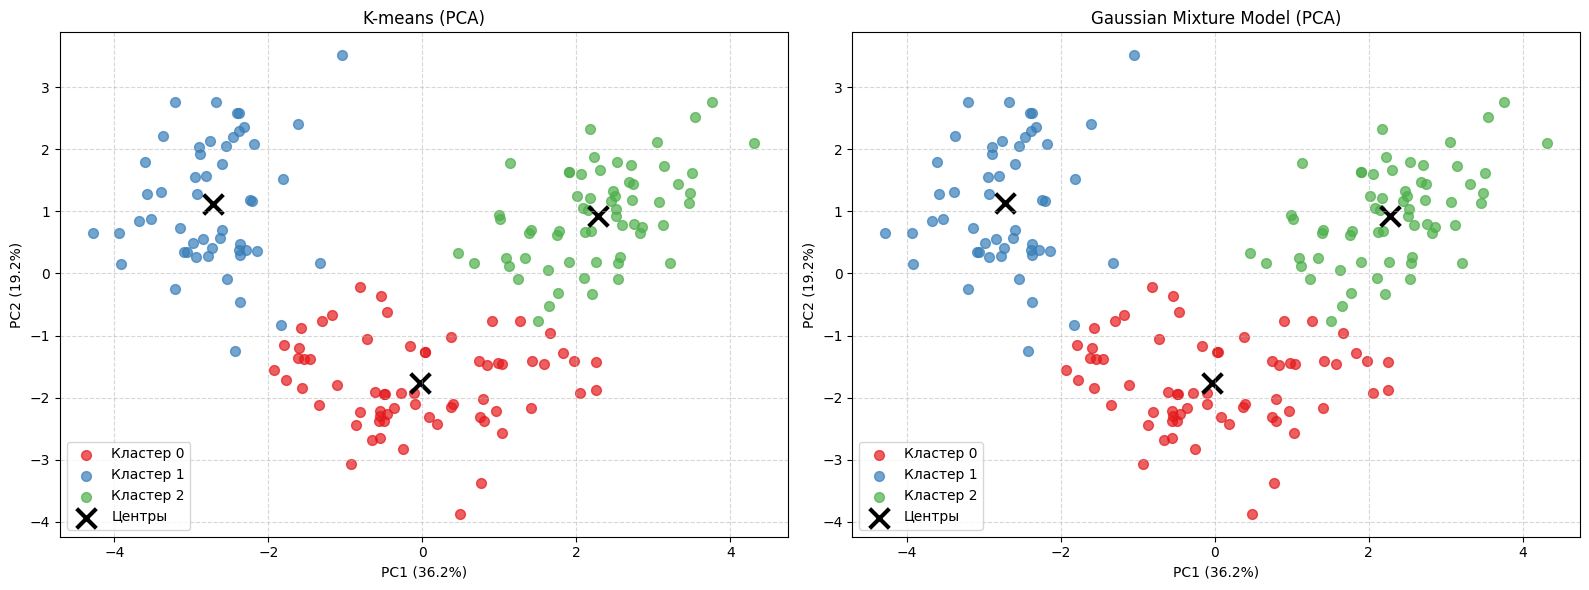

In [35]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled.values)

df_plot = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_plot['KMeans'] = labels_kmeans
df_plot['GMM'] = labels_gmm

centers_kmeans_pca = pca.transform(centers_scaled)
centers_gmm_pca = pca.transform(centers_gmm_scaled)

explained_var = pca.explained_variance_ratio_
print(f"Объяснённая дисперсия: PC1 = {explained_var[0]:.1%}, PC2 = {explained_var[1]:.1%}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-means
for i in range(3):
    mask = df_plot['KMeans'] == i
    axes[0].scatter(df_plot.loc[mask, 'PC1'], df_plot.loc[mask, 'PC2'],
                    color=plt.cm.Set1(i), label=f'Кластер {i}', alpha=0.7, s=50)

axes[0].scatter(centers_kmeans_pca[:, 0], centers_kmeans_pca[:, 1],
                color='black', marker='x', s=200, linewidths=3, label='Центры')
axes[0].set_title('K-means (PCA)')
axes[0].set_xlabel(f'PC1 ({explained_var[0]:.1%})')
axes[0].set_ylabel(f'PC2 ({explained_var[1]:.1%})')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# GMM
for i in range(3):
    mask = df_plot['GMM'] == i
    axes[1].scatter(df_plot.loc[mask, 'PC1'], df_plot.loc[mask, 'PC2'],
                    color=plt.cm.Set1(i), label=f'Кластер {i}', alpha=0.7, s=50)

axes[1].scatter(centers_gmm_pca[:, 0], centers_gmm_pca[:, 1],
                color='black', marker='x', s=200, linewidths=3, label='Центры')
axes[1].set_title('Gaussian Mixture Model (PCA)')
axes[1].set_xlabel(f'PC1 ({explained_var[0]:.1%})')
axes[1].set_ylabel(f'PC2 ({explained_var[1]:.1%})')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Визуализация кластеров в пространстве двух главных компонент (PC1 и PC2) демонстрирует, что оба метода - K-means и Gaussian Mixture Model - выделяют практически идентичные группы точек, что подтверждает устойчивость полученного разбиения. Центры кластеров, отмеченные крестами, находятся в одинаковых позициях на обоих графиках, а распределение объектов по цветам (красный, синий, зелёный) почти полностью совпадает, что свидетельствует о высокой согласованности алгоритмов при работе с данным датасетом. 

Содержательная интерпретация групп остаётся неизменной: красный кластер соответствует лёгким винам с низким содержанием пролина и интенсивностью цвета, синий - кислым и тёмным винам с высоким уровнем яблочной кислоты, зелёный - богатым, насыщенным винам с высокими значениями флаваноидов и пролина. Несмотря на частичное перекрытие между группами, особенно в центральной области пространства PCA, границы кластеров достаточно чётко очерчены, что позволяет дать осмысленную биохимическую классификацию.

## 6. Заключение
Сравнительный анализ K-means и Gaussian Mixture Model показал, что оба метода выделяют практически идентичные кластеры как по структуре, так и по составу объектов, что подтверждается совпадением центров на визуализации и близостью метрик качества: силуэтный коэффициент (0.285) и индекс Калинского–Харабаша (70.9) оказались одинаковыми для обоих подходов. Это говорит о том, что признаковое пространство датасета Wine имеет устойчивую, компактную и близкую к сферической структуру кластеров, которую K-means способен эффективно моделировать без необходимости применения более сложных вероятностных моделей. GMM, несмотря на свою гибкость в описании эллиптических форм и разной плотности, не привнёс дополнительного качества разбиения, поскольку естественные группы в данных не демонстрируют выраженных перекрытий или асимметрии, требующих вероятностного подхода.

Выделенные кластеры имеют ясную содержательную интерпретацию: первый соответствует лёгким, менее насыщенным винам; второй - кислым, тёмным, с высокой цветовой интенсивностью; третий - богатым, насыщенным антиоксидантами винам с высоким уровнем пролина и алкоголем, типичным для качественных сортов. Такое разбиение согласуется с известной классификацией вин по происхождению и технологическим особенностям.

Таким образом, можно сделать вывод, что K-means является предпочтительным методом для данного типа данных: он быстрее, проще в интерпретации и даёт результаты, не уступающие более сложным алгоритмам. GMM может быть полезен при наличии выраженных перекрытий или неоднородной плотности, но в данном случае его преимущества не реализуются. Датасет Wine хорошо подходит для кластеризации благодаря чёткой химической структуре признаков, однако частичное перекрытие групп и влияние выбросов ограничивают качество разбиения, что отражается в умеренных значениях силуэтного коэффициента.